Best Hyperparameters: {'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.24
Classification Report:
               precision    recall  f1-score   support

   Excellent       0.35      0.34      0.35        58
        Fair       0.15      0.21      0.17        39
        Good       0.19      0.18      0.19        50
        Poor       0.28      0.23      0.25        53

    accuracy                           0.24       200
   macro avg       0.24      0.24      0.24       200
weighted avg       0.25      0.24      0.25       200


Feature Importance:
           Feature  Importance
0          Income    0.484615
1            Debt    0.447405
2  Credit_History    0.067980


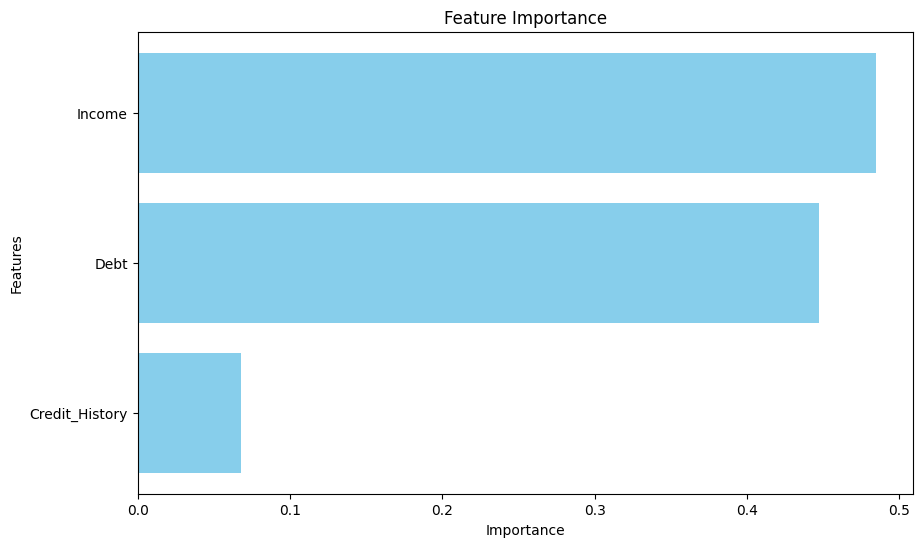

In [1]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV  # Import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a larger dataset
num_samples = 1000

data = {
    'Income': np.random.randint(30000, 120000, num_samples),
    'Debt': np.random.randint(5000, 30000, num_samples),
    'Credit_History': np.random.choice([0, 1], num_samples),
    'Credit_Score': np.random.choice(['Poor', 'Fair', 'Good', 'Excellent'], num_samples)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('larger_credit_data.csv', index=False)

# Assuming 'Credit_Score' is your target variable
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

# Encode categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing: Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Random Forest classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create and train the model with the best parameters
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print the results
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()
